In [ ]:
%pip install google-genai

In [ ]:
import google.generativeai as genai

In [ ]:
from google.colab import userdata
import os

os.environ['GOOGLE_API_KEY'] = userdata.get('API_KEY')

In [ ]:
!apt-get update -qq && apt-get install -qq locales
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8 LC_ALL=en_US.UTF-8

!apt-get -qq -y install espeak-ng > /dev/null 2>&1
%pip install -q google-generativeai moviepy Pillow
%pip install -q nest_asyncio

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Generating locales (this might take a while)...
  en_US.UTF-8... done
Generation complete.


In [ ]:
import os
import json
import numpy as np
from io import BytesIO

from PIL import Image
from IPython.display import display


from moviepy.editor import ImageClip, AudioFileClip, CompositeVideoClip, concatenate_videoclips

import time
from IPython.display import HTML
from base64 import b64encode

import typing_extensions as typing


import nest_asyncio
nest_asyncio.apply()
import asyncio
import contextlib
import wave


from google import genai

In [ ]:
from google import genai
client = genai.Client(http_options = {
    'api_version':'v1alpha'
})

MODEL = "models/gemini-2.0-flash-exp"

IMAGE_MODEL_ID = "imagen-3.0-generate-002"

In [ ]:

class StorySegment(typing.TypedDict):
  image_prompt: str
  audio_text: str
  character_description:str


class StoryResponse(typing.TypedDict):
  complete_story: list[StorySegment]
  pages:int

def generate_story_sequence(complete_story:str, pages:int) -> list[StoryResponse]:
  response = client.models.generate_content(
      model=MODEL,
      contents=f'''you are an animation video producer. Generate a story sequence about {complete_story} in {pages} scenes (with interactions and characters), 1 sec each scene. Write:

image_prompt:(define art style for kids animation(consistent for all the characters), no violence) a full description of the scene, the characters in it, and the background in 20 words or less. Progressively shift the scene as the story advances.
audio_text: a one-sentence dialogue/narration for the scene.
character_description: no people ever, only animals and objects. Describe all characters (consistent names, features, clothing, etc.) with an art style reference (e.g., "Pixar style," "photorealistic," "Ghibli") in 30 words or less.
''',
      config={
          'response_mime_type':'application/json',
          'response_schema': list[StoryResponse]
      }
  )
  try:
    story_data_text = response.text
    story_data_list = json.loads(story_data_text)
    if isinstance(story_data_list,list) and len(story_data_list)>0:
      story_data = story_data_list[0]
      return story_data.get('complete_story',[]),story_data.get('character_description',{})
    else:
      return[]
  except (KeyError, TypeError, IndexError, json.JSONDecodeError) as e:
    print(f"Error parsing story data: {e}")
    return[]






In [ ]:
theme = "A stickman/stickfigure meaning a circle and lines for body, is shooting darts at a target from a distant location, he shoots a dart but misses, he tries again but the second dart hits a honeycomb and bees chase him. he is dejected but doesn't give up. the third time he hits the target and is very happy.make his body out of thick black lines.title the story practice makes perfect"
num_scenes = 4

story_segments, _ = generate_story_sequence(theme, num_scenes)
print(json.dumps(story_segments,indent=2))

[
  {
    "image_prompt": "Stickman far from target, aiming a dart. Grassy field background, blue sky. Target is far away.",
    "audio_text": "Stickman is practicing his aim, but the first dart misses badly.",
    "character_description": "Stickman: Thick black lines, circle head, minimalist design, optimistic. Dart: Classic feathered dart. Target: Red and white concentric circles. (Art style: Kids animation, bright colors)"
  },
  {
    "image_prompt": "Stickman shoots a dart, hits a honeycomb. Bees swarm around him, chasing him.",
    "audio_text": "Oh no! The second dart hit a honeycomb and now he is in trouble.",
    "character_description": "Stickman: Thick black lines, circle head, minimalist design, scared. Bees: Yellow and black stripes, cartoonish wings. Honeycomb: Golden yellow, dripping honey. (Art style: Kids animation, bright colors)"
  },
  {
    "image_prompt": "Stickman looks dejected. He sits on the ground, but resolves to try again.",
    "audio_text": "Feeling down,

In [ ]:
@contextlib.contextmanager
def wave_file(filename, channels=1, rate=24000, sample_width=2):
    with wave.open(filename, "wb") as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(sample_width)
        wf.setframerate(rate)
        yield wf

In [ ]:
temp_audio_files = []  
temp_image_files = []  
video_clips = []      


def generate_audio_live(api_text, output_filename):
    import asyncio
    collected_audio = bytearray()

    async def _generate():
        config = {
            "response_modalities": ["AUDIO"]
        }
        async with client.aio.live.connect(model=MODEL, config=config) as session:
            await session.send(input=api_text, end_of_turn=True)
            async for response in session.receive():
                if response.data:
                    collected_audio.extend(response.data)
        return bytes(collected_audio)

    audio_bytes = asyncio.run(_generate())
    with wave_file(output_filename) as wf:
        wf.writeframes(audio_bytes)
    return output_filename



audio_negative_prompt = "don't say OK , I will do this or that, just only read this story using voice expressions without introductions or ending ,more segments are coming ,don't say OK , I will do this or that:\n"

Processing scene 0:
Image Prompt: Stickman far from target, aiming a dart. Grassy field background, blue sky. Target is far away.
Audio Text: Stickman is practicing his aim, but the first dart misses badly.
Character Description: Stickman: Thick black lines, circle head, minimalist design, optimistic. Dart: Classic feathered dart. Target: Red and white concentric circles. (Art style: Kids animation, bright colors)
--------------------------------


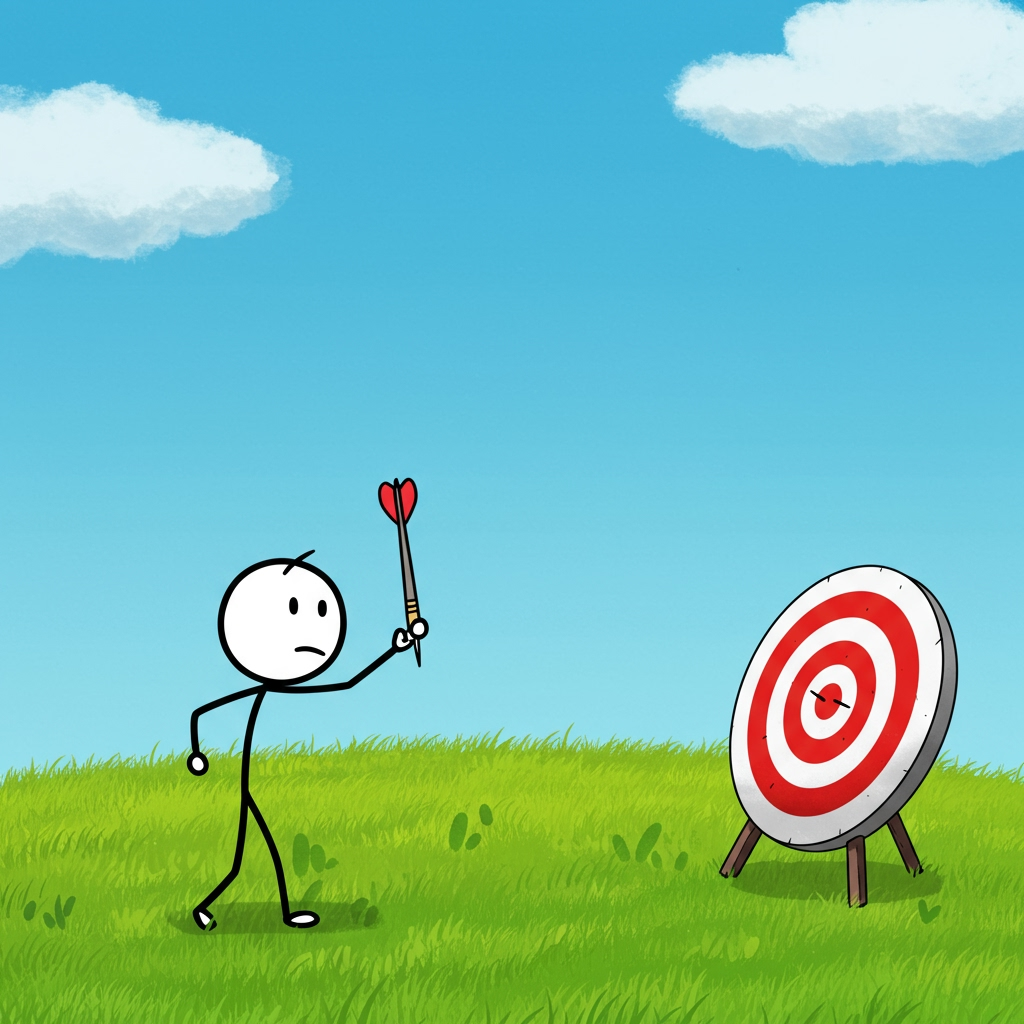

Please use one of the more specific methods: `send_client_content`, `send_realtime_input`, or `send_tool_response` instead.
  await session.send(input=api_text, end_of_turn=True)



Processing scene 1:
Image Prompt: Stickman shoots a dart, hits a honeycomb. Bees swarm around him, chasing him.
Audio Text: Oh no! The second dart hit a honeycomb and now he is in trouble.
Character Description: Stickman: Thick black lines, circle head, minimalist design, scared. Bees: Yellow and black stripes, cartoonish wings. Honeycomb: Golden yellow, dripping honey. (Art style: Kids animation, bright colors)
--------------------------------


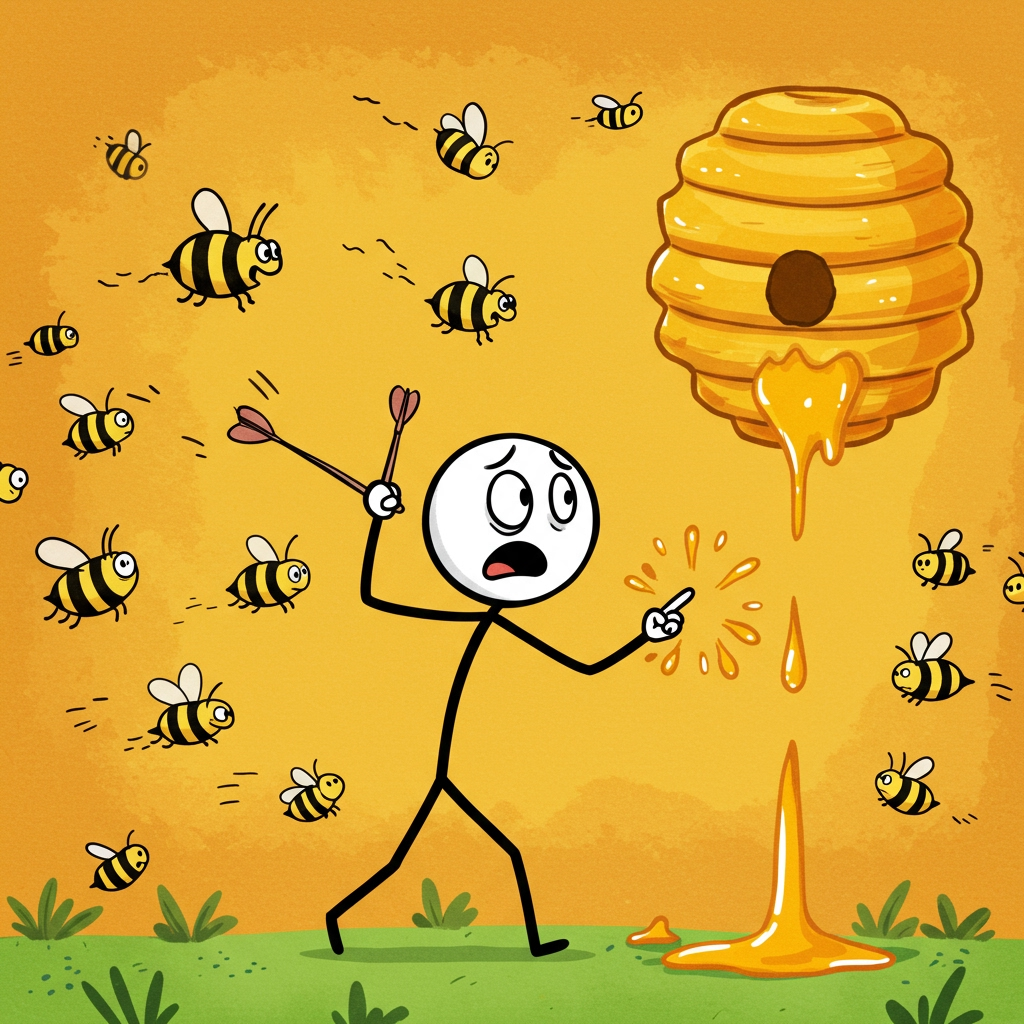

Processing scene 2:
Image Prompt: Stickman looks dejected. He sits on the ground, but resolves to try again.
Audio Text: Feeling down, Stickman almost gives up, but he decides to try once more.
Character Description: Stickman: Thick black lines, circle head, minimalist design, determined. Dart: Classic feathered dart. Ground: Grassy area. (Art style: Kids animation, bright colors)
--------------------------------


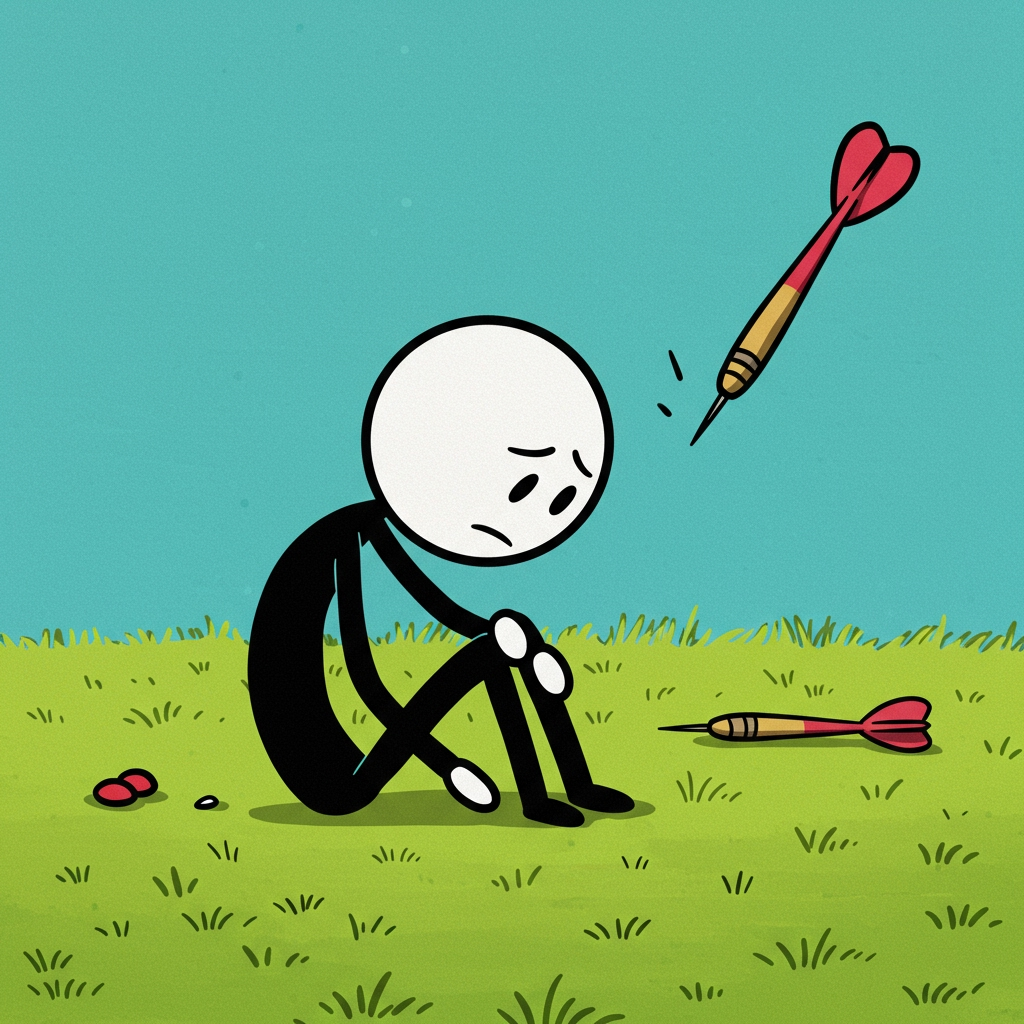

Processing scene 3:
Image Prompt: Stickman hits the bullseye! He jumps for joy, very happy. Target has a dart in the center.
Audio Text: Success! With practice, Stickman finally hits the target!
Character Description: Stickman: Thick black lines, circle head, minimalist design, joyful. Dart: Classic feathered dart stuck in the bullseye. Target: Red and white concentric circles. (Art style: Kids animation, bright colors)
--------------------------------


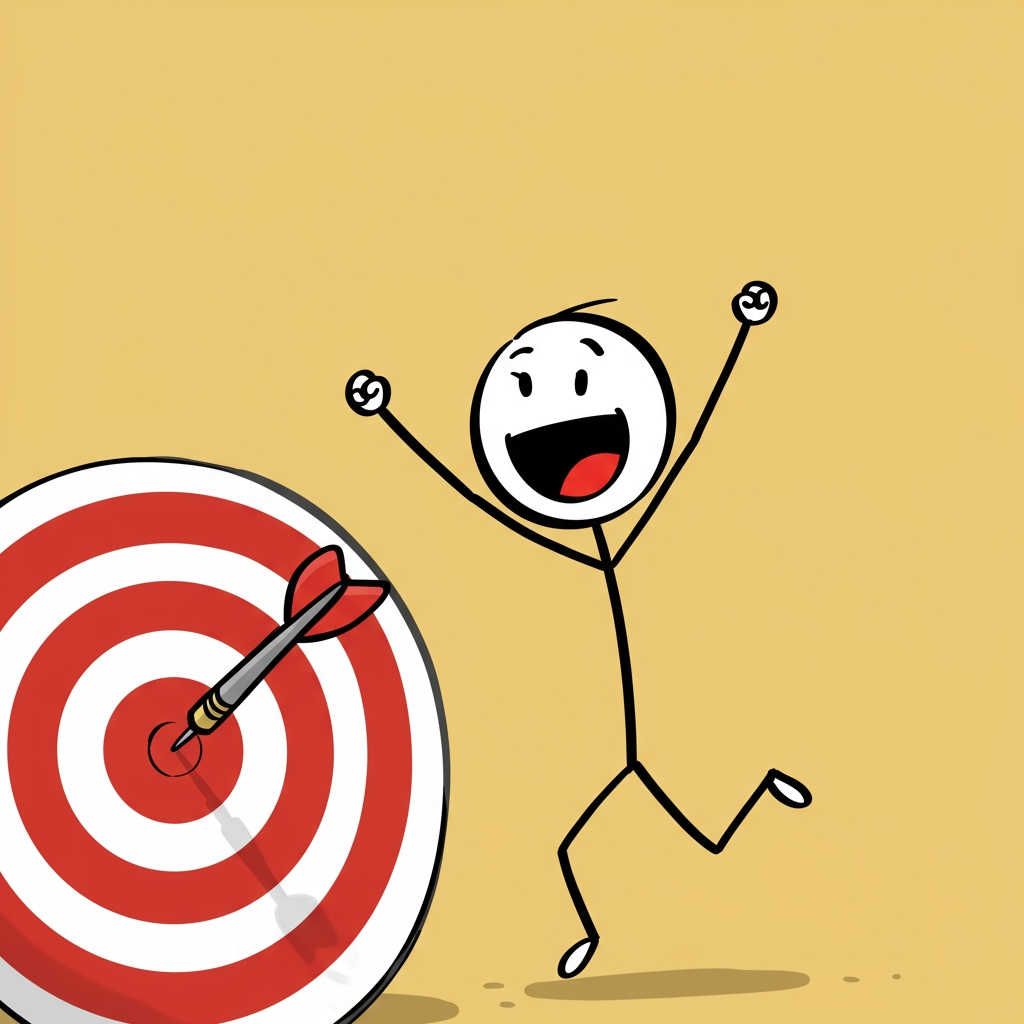

In [ ]:
for i, segment in enumerate(story_segments):
    image_prompt = segment['image_prompt']
    audio_text =  audio_negative_prompt + segment['audio_text']
    audio_text_prompt = segment['audio_text']
    char_desc = segment['character_description']
    print(f"Processing scene {i}:")
    print("Image Prompt:", image_prompt)
    print("Audio Text:", audio_text_prompt)
    print("Character Description:", char_desc)
    print("--------------------------------")

    combined_prompt = "detailed children book animation style " + image_prompt + " " + char_desc

    result = client.models.generate_images(
        model=IMAGE_MODEL_ID,
        prompt=combined_prompt,
        config={
            "number_of_images": 1,
            "output_mime_type": "image/jpeg",
            "person_generation": "DONT_ALLOW",
            "aspect_ratio": "1:1"
        }
    )

    try:
        if not result.generated_images:
            raise ValueError("No images were generated. The prompt might have been flagged as harmful. Please modify your prompt and try again.")
        for generated_image in result.generated_images:
            image = Image.open(BytesIO(generated_image.image.image_bytes))
    except Exception as e:
        print("Image generation failed ", e)

    image_path = f"image_{i}.png"
    image.save(image_path)
    temp_image_files.append(image_path)
    display(image)

    audio_path = f"audio_{i}.wav"
    audio_path = generate_audio_live(audio_text, audio_path)
    temp_audio_files.append(audio_path)

    audio_clip = AudioFileClip(audio_path)

    np_image = np.array(image)

    image_clip = ImageClip(np_image).set_duration(audio_clip.duration)

    composite_clip = CompositeVideoClip([image_clip]).set_audio(audio_clip)
    video_clips.append(composite_clip)

In [ ]:
final_video = concatenate_videoclips(video_clips)
output_filename = f"{int(time.time())}_output_video.mp4"
print("Writing final video to", output_filename)
final_video.write_videofile(output_filename, fps=24)

# Display the video 
def show_video(video_path):
    """Display video in notebook"""
    video_file = open(video_path, "rb")
    video_bytes = video_file.read()
    video_b64 = b64encode(video_bytes).decode()
    video_tag = f'<video width="640" height="480" controls><source src="data:video/mp4;base64,{video_b64}" type="video/mp4"></video>'
    return HTML(video_tag)

display(show_video(output_filename))

final_video.close()
for clip in video_clips:
    clip.close()
for file in temp_audio_files:
    os.remove(file)
for file in temp_image_files:
    os.remove(file)




Writing final video to 1747250035_output_video.mp4
Moviepy - Building video 1747250035_output_video.mp4.
MoviePy - Writing audio in 1747250035_output_videoTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video 1747250035_output_video.mp4



Moviepy - Done !
Moviepy - video ready 1747250035_output_video.mp4
